### Consider the following input as: 
![INPUT.png](https://github.com/sushant097/Simple-Neural-Network-In-Python/blob/master/INPUT.png)
**As we see the output is same as the value in left most input column. So, the value of '?' should be 1**
# Let's start to build the neural network and predict the output as following
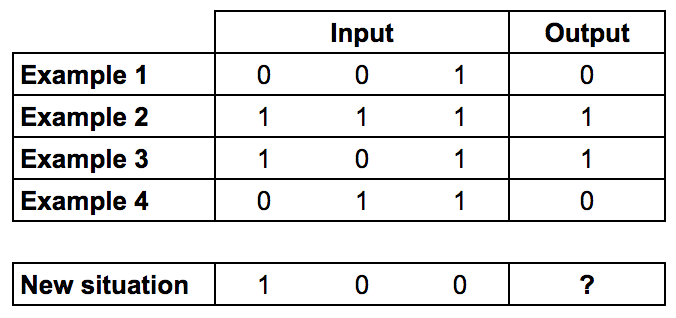

In [23]:
from numpy import exp, array, random, dot

# The training set. We have 4 examples, each consisting of 3 input values
    # and 1 output value.
    
training_set_inputs = array([[0,0,1], [1,1,1],[1,0,1],[0,1,1]])
training_set_outputs = array([[0,1,1,0]]).T


The '.T' function, transposes the matrix from horixontal to vertical. So the comuter is storing the numbers like this.
![matrix.png](https://github.com/sushant097/Simple-Neural-Network-In-Python/blob/master/matrix.png)
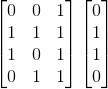

# Training process
In overall we perform the following steps:
1. Take the inputs from a training set example, adjust them by    the weights, and pass them through a special formula to        calculate the neuron’s output.

2. Calculate the error, which is the difference between the        neuron’s output and the desired output in the training set      example.

3. Depending on the direction of the error, adjust the weights    slightly.

4. Repeat this process 10, 000 times.

![BasicBackPropagation.jpg](https://github.com/sushant097/Simple-Neural-Network-In-Python/blob/master/neuronOutput.png)

#### How to calculate the neuron output? As we calculate the sum of weighted inputs and output as:

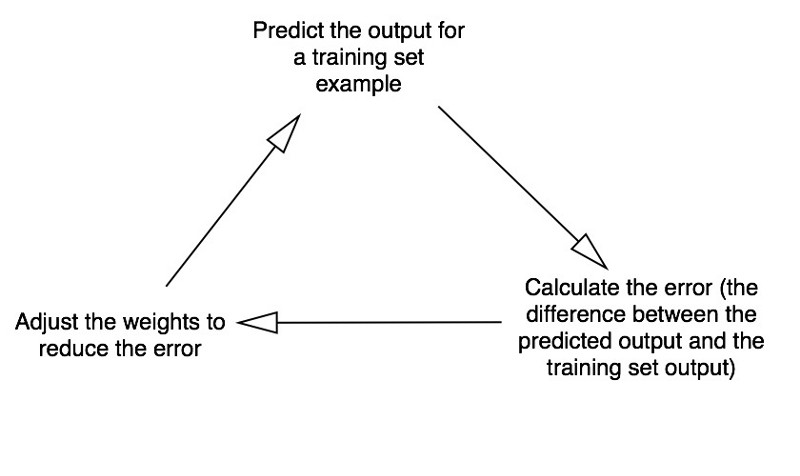

In [24]:
class NeuralNetwork():
    
    def __init__(self):
        # Seed the random number generator, so it generated the same numbers
        # every time the program runs.
        random.seed(1)
        # as assign random weights to a 3 * 1 matrix, with values in the range -1 to 1 and mean 0.
        self.synaptic_weights = 2 * random.random((3,1)) -1
    
    def __sigmoid(self, x):
        return 1 / (1+ exp(-x))
    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    
    def __sigmoid_derivative(self, x):
        return x * (1 - x)
     # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our Neural network (a single neuron).
            output = self.think(training_set_inputs)
            
            # Calculate the error( THe difference between the desired output and the predicted output
            error = training_set_outputs - output
            
            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
            
            # Adjust the weights.
            self.synaptic_weights += adjustment
            
    
    # THe neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our sigle neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))
    



In [35]:
if __name__ == "__main__":
    # Initialize a single neuron neural network.
    neural_network = NeuralNetwork()
    
    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)
    
    
     # Train the neural network using a training set.
    # Do it 10,000 times and make small adjustments each time.
    
    neural_network.train(training_set_inputs, training_set_outputs, 10000)
    
    print("New synaptic weights after training: \n{}".format(neural_network.synaptic_weights))
    
    
    

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]


In [36]:
# Test the neural network with a new situation
print("Considering new situation [1, 0, 0] -> ?:")
print(neural_network.think([1,0,0]))

Considering new situation [1, 0, 0] -> ?:
[0.99993704]


### As we see that the output of the neural network is close to 1. So, we build the neural network to think and predict the new input outputs.

In [39]:
print("Considerring new situation [0, 1, 0] -> ?:") # as we know output should equal to zero of left column value
print(neural_network.think([0, 1, 0])) 

Considerring new situation [0, 1, 0] -> ?:
[0.44822538]


In [51]:
## Accuracy
input_arr = [0,1,0]
predict_output = neural_network.think(input_arr)
desired_output = input_arr[0] ## left column as output
err = desired_output - predict_output
err = err if err >=0 else -err # finding absolute value
print(err)
accuracy = (err/predict_output) * 100
print("THe accuracy of the prediction is: {} ".format(accuracy))
# As the accuracy is almost high but it is not always true as we need another method to calculate accuracy

[0.44822538]
THe accuracy of the prediction is: [100.] 


As output of this time is ``0.44822538 i.e < 0.5`` when we round of equal to zero .
But this accuracy gets increased on increase on training iteration we performed.
**Thanks for visiting. Good Luck**